#**Problem: The expected length of the smallest interval**

### Suppose we pick n points randomly uniformly and independently from the [0,1] line segment. This will create n+1 intervals. What is the expected length of the smallest interval among these intervals.

### We simulate the problem and check whether the emperical and anaytical values agree.

In [1]:
# Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Expected Value of Length of Smallest Interval

In [2]:
# No. of points
n = 3
# No. of times the problem is simulated
times = 5000

<ipython-input-3-e1d239d378d0>:20: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7e65d9e7b610> starts with '_'. It is thus excluded from the legend.
  plt.legend(['_','Theoretical Expected Value'])


Text(0.5, 1.0, 'The Average Length of Smallest Interval')

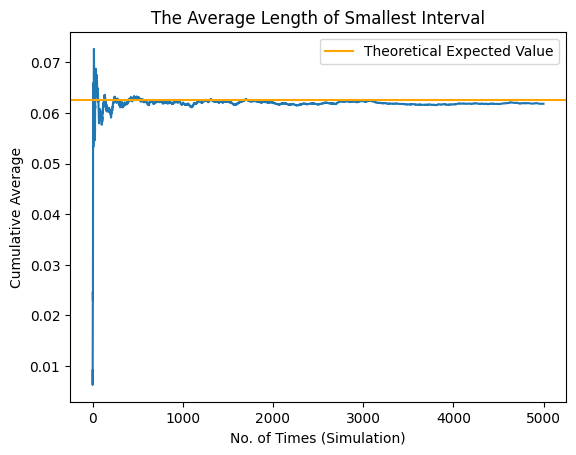

In [3]:
# Length of smallest intervals for every simulation
mintervals = []
cumulative_avg = []
add = 0
for i in range(1, times+1):
  points = np.random.default_rng().uniform(0,1,n)
  points = np.append(points, [0, 1])
  points.sort()
  mintervals.append(min(np.diff(points)))
  add = add + mintervals[-1]
  cumulative_avg.append(add/i)

# Plot of Average Length of smallest interval
plt.plot(cumulative_avg)
# Expected Theoretical value of the smallest interval
plt.axhline(1/((n+1)*(n+1)), color='orange')

plt.xlabel('No. of Times (Simulation)')
plt.ylabel('Cumulative Average')
plt.legend(['_','Theoretical Expected Value'])
plt.title('The Average Length of Smallest Interval')

## Distribution of Length of smallest interval

Text(0.5, 1.0, 'CDF of Length of Smallest Interval')

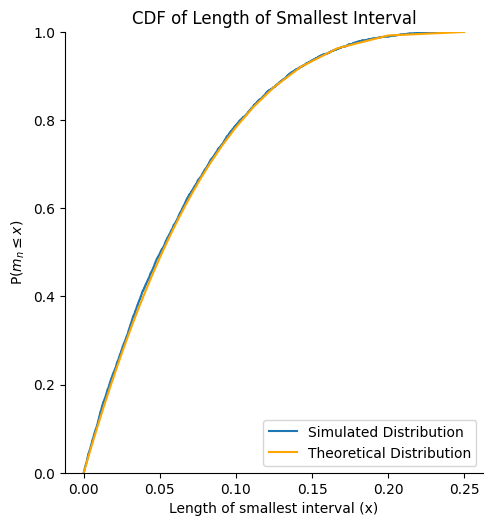

In [4]:
# Distribution of Length of smallest interval
intervals = [0]
intervals.extend([1/x for x in range(10000, n, -1)])
theoretical_dist = [1-(1 - (n + 1)*x)**n for x in intervals]

sns.displot(mintervals, kind='ecdf')
plt.plot(intervals, theoretical_dist, color = 'orange')
plt.xlabel('Length of smallest interval (x)')
plt.ylabel('P($m_{n} \leq x$)')
plt.legend(labels = ['Simulated Distribution', 'Theoretical Distribution'])
plt.title('CDF of Length of Smallest Interval')

## Expected Value of Length of Smallest Interval for different n

In [5]:
n = 100
times = 1000

Text(0.5, 1.0, 'Expected Length of Smallest Interval vs n')

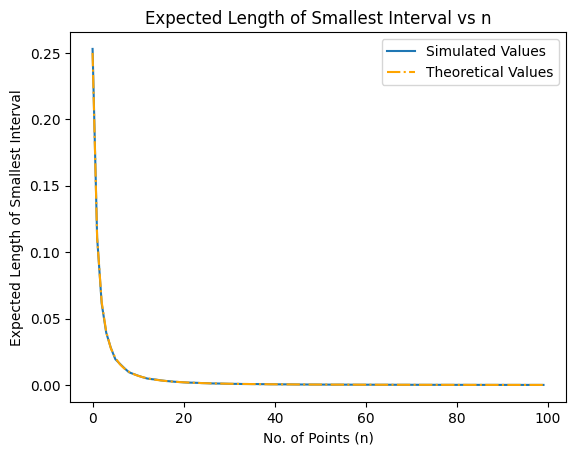

In [6]:
avg_mintervals = []
theoretical_curve = []
for i in range(1, n+1):
  add = 0
  for _ in range(1, times+1):
    points = np.random.default_rng().uniform(0,1,i)
    points = np.append(points, [0, 1])
    points.sort()
    add = add + min(np.diff(points))
  avg_mintervals.append(add/times)
  theoretical_curve.append(1/((i+1)*(i+1))) # 1/(n+1)^2

plt.plot(avg_mintervals)
plt.plot(theoretical_curve, linestyle='dashdot', color='orange')

plt.xlabel('No. of Points (n)')
plt.ylabel('Expected Length of Smallest Interval')
plt.legend(labels = ['Simulated Values', 'Theoretical Values'])
plt.title('Expected Length of Smallest Interval vs n')

#**The Theoretical and Simulated Values agree.**